# Prediction model for Collision severity
# Balaji Mohan
## September 15, 2020

# Introduction/ Business Problem

Road accidents occur when a vehicle collides with another vehicle, pedestrian, animal, tree, or any stationary object like a building. Road accidents cause property damage or sometimes injury leading to either disability or even extreme case a threat to life.

Road accidents may occur due to various factors like visibility, traffic congestion on certain days, or weather. There are several statistics available in both open and closed domains for people to analyze and also create models to avoid road accidents in the future.

Once the models are created, it can either help reduce road accidents by warning the human beings or feeding these models into Autonomous vehicle systems to make clever decisions to avoid accidents.

The model can serve society in a very beneficial way of reducing property loss as well as the loss of life.

This model will particularly be helpful to the traffic department in warning the drivers by placing appropriate sign boards were accidents can be avoided. It can also serve the autonomous vehicle manufacturer to incorporate it into their vehicle system to make clever decisions based on the situations to avoid accidents.

# Data

The dataset used in this study consists of 37 attributes and one target. The road accidents may be of any kind like a car collision, bicycle, other vehicle collisions. The data is collected from 2004 to present and provided by SPD and recorded by traffic records. The dataset is updated weekly based on the data collected every week.

The dataset was imbalanced with a lot of unknowns and null values. The dataset was cleaned by assigning the modal value of each attribute to the unknowns and null values. Then the attributes were encoded using a label encoder to assign integer values. 

# Methodology

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
accident_df = pd.read_csv('Data-Collisions.csv',encoding = "utf-8",low_memory=False)
accident_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
#getting the shape of the dataset
print("Rows: ",accident_df.shape[0])
print("Columns: ",accident_df.shape[1])

Rows:  194673
Columns:  38


In [4]:
#full description of the dataset
accident_df.describe(include="all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,63,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1780512,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,44421,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


<h2>Column name description</h2>
<ul>
<li>X - Coordinates</li>
<li>Y - Coordinates</li>
<li>WEATHER - How the weather was during the collision</li>
<li>SPEEDING - If speeding caused the collision</li>
<li>LIGHTCOND - Visiblity during the collision</li>
<li>ROADCOND - Condition of the road</li>
<li>JUNCTION TYPE - If the collision happened at a junction</li>
<li>PERSONCOUNT - Total number of people involved in the collision</li>
<li>VEHCOUNT - Total vehicles of people involved in the collision</li>
</ul>

In [5]:
import numpy as np
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [6]:
#removing the attributes we need
accident = accident_df[["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT","SEVERITYCODE"]]
accident.head()

,WEATHER,SPEEDING,LIGHTCOND,ROADCOND,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT,SEVERITYCODE
0,Overcast,NaN,Daylight,Wet,At Intersection (intersection related),2,2,2
1,Raining,NaN,Dark - Street Lights On,Wet,Mid-Block (not related to intersection),2,2,1
2,Overcast,NaN,Daylight,Dry,Mid-Block (not related to intersection),4,3,1
3,Clear,NaN,Daylight,Dry,Mid-Block (not related to intersection),3,3,1
4,Raining,NaN,Daylight,Wet,At Intersection (intersection related),2,2,2


Next we clean the data

In [7]:
accident.WEATHER.value_counts(dropna=False)

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
NaN                           5081
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [8]:
pd.set_option('mode.chained_assignment', None)
accident['WEATHER'].fillna(accident['WEATHER'].mode()[0], inplace=True)
accident['WEATHER'] = accident['WEATHER'].replace(['Unknown'],accident['WEATHER'].mode()[0])
accident = accident[accident.WEATHER !="Other"]

In [9]:
accident.WEATHER.value_counts(dropna=False)

Clear                       131307
Raining                      33145
Overcast                     27714
Snowing                        907
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [10]:
accident.SPEEDING.value_counts(dropna=False)

NaN    184527
Y        9314
Name: SPEEDING, dtype: int64

In [11]:
#replace NaN with N
accident['SPEEDING'] = accident['SPEEDING'].fillna('N')

In [12]:
accident.SPEEDING.value_counts(dropna=False)

N    184527
Y      9314
Name: SPEEDING, dtype: int64

In [13]:
accident.LIGHTCOND.value_counts(dropna=False)

Daylight                    115835
Dark - Street Lights On      48365
Unknown                      13156
Dusk                          5880
NaN                           5164
Dawn                          2494
Dark - No Street Lights       1528
Dark - Street Lights Off      1194
Other                          216
Dark - Unknown Lighting          9
Name: LIGHTCOND, dtype: int64

In [14]:
accident['LIGHTCOND'].fillna(accident['LIGHTCOND'].mode()[0], inplace=True)
accident['LIGHTCOND'] = accident['LIGHTCOND'].replace(['Unknown'],accident['LIGHTCOND'].mode()[0])
accident = accident[accident.LIGHTCOND !="Other"]

In [15]:
accident.LIGHTCOND.value_counts(dropna=False)

Daylight                    134155
Dark - Street Lights On      48365
Dusk                          5880
Dawn                          2494
Dark - No Street Lights       1528
Dark - Street Lights Off      1194
Dark - Unknown Lighting          9
Name: LIGHTCOND, dtype: int64

In [16]:
accident.ROADCOND.value_counts(dropna=False)

Dry               124224
Wet                47320
Unknown            14524
NaN                 5010
Ice                 1189
Snow/Slush           990
Other                119
Standing Water       112
Sand/Mud/Dirt         74
Oil                   63
Name: ROADCOND, dtype: int64

In [17]:
accident['ROADCOND'].fillna(accident['ROADCOND'].mode()[0], inplace=True)
accident['ROADCOND'] = accident['ROADCOND'].replace(['Unknown'],accident['ROADCOND'].mode()[0])

In [18]:
accident.ROADCOND.value_counts(dropna=False)

Dry               143758
Wet                47320
Ice                 1189
Snow/Slush           990
Other                119
Standing Water       112
Sand/Mud/Dirt         74
Oil                   63
Name: ROADCOND, dtype: int64

In [19]:
accident.JUNCTIONTYPE.value_counts(dropna=False)

Mid-Block (not related to intersection)              89145
At Intersection (intersection related)               62650
Mid-Block (but intersection related)                 22713
Driveway Junction                                    10624
NaN                                                   6231
At Intersection (but not related to intersection)     2089
Ramp Junction                                          164
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [20]:
accident['JUNCTIONTYPE'].fillna(accident['JUNCTIONTYPE'].mode()[0], inplace=True)
accident = accident[accident.JUNCTIONTYPE !="Unknown"]

In [21]:
accident.JUNCTIONTYPE.value_counts(dropna=False)

Mid-Block (not related to intersection)              95376
At Intersection (intersection related)               62650
Mid-Block (but intersection related)                 22713
Driveway Junction                                    10624
At Intersection (but not related to intersection)     2089
Ramp Junction                                          164
Name: JUNCTIONTYPE, dtype: int64

In [22]:
accident.SEVERITYCODE.value_counts(dropna=False)

1    135596
2     58020
Name: SEVERITYCODE, dtype: int64

# Create Model 

In [23]:
x = accident[["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT"]].values
y = accident[["SEVERITYCODE"]].values

In [24]:
weather = preprocessing.LabelEncoder()
weather.fit(list(accident["WEATHER"].unique()))
weather_mapping = dict(zip(weather.classes_, weather.transform(weather.classes_)))
x[:,0] = weather.transform(x[:,0]) 

speeding = preprocessing.LabelEncoder()
speeding.fit(list(accident["SPEEDING"].unique()))
speeding_mapping = dict(zip(speeding.classes_, speeding.transform(speeding.classes_)))
x[:,1] = speeding.transform(x[:,1]) 

lightcond = preprocessing.LabelEncoder()
lightcond.fit(list(accident["LIGHTCOND"].unique()))
lightcond_mapping = dict(zip(lightcond.classes_, lightcond.transform(lightcond.classes_)))
x[:,2] = lightcond.transform(x[:,2])

roadcond = preprocessing.LabelEncoder()
roadcond.fit(list(accident["ROADCOND"].unique()))
roadcond_mapping = dict(zip(roadcond.classes_, roadcond.transform(roadcond.classes_)))
x[:,3] = roadcond.transform(x[:,3])

junctiontype = preprocessing.LabelEncoder()
junctiontype.fit(list(accident["JUNCTIONTYPE"].unique()))
junctiontype_mapping = dict(zip(junctiontype.classes_, junctiontype.transform(junctiontype.classes_)))
x[:,4] = junctiontype.transform(x[:,4])

In [25]:
accident = pd.DataFrame(x)
accident.columns = ["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT"]
accident['SEVERITYCODE'] = y
accident.head()

,WEATHER,SPEEDING,LIGHTCOND,ROADCOND,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT,SEVERITYCODE
0,3,0,5,7,1,2,2,2
1,5,0,2,7,4,2,2,1
2,3,0,5,0,4,4,3,1
3,1,0,5,0,4,3,3,1
4,5,0,5,7,1,2,2,2


In [26]:
accident['PERSONCOUNT_CAT'] = pd.qcut(accident['PERSONCOUNT'], q=4, duplicates='drop')
accident['VEHCOUNT_CAT'] = pd.qcut(accident['PERSONCOUNT'], q=4, duplicates='drop')
accident.head()

,WEATHER,SPEEDING,LIGHTCOND,ROADCOND,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT,SEVERITYCODE,PERSONCOUNT_CAT,VEHCOUNT_CAT
0,3,0,5,7,1,2,2,2,"(-0.001, 2.0]","(-0.001, 2.0]"
1,5,0,2,7,4,2,2,1,"(-0.001, 2.0]","(-0.001, 2.0]"
2,3,0,5,0,4,4,3,1,"(3.0, 81.0]","(3.0, 81.0]"
3,1,0,5,0,4,3,3,1,"(2.0, 3.0]","(2.0, 3.0]"
4,5,0,5,7,1,2,2,2,"(-0.001, 2.0]","(-0.001, 2.0]"


In [27]:
x = accident[["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT","SEVERITYCODE",
            "PERSONCOUNT_CAT","VEHCOUNT_CAT"]].values

person = preprocessing.LabelEncoder()
person.fit(list(accident["PERSONCOUNT_CAT"].unique()))
person_mapping = dict(zip(person.classes_, person.transform(person.classes_)))
x[:,8] = person.transform(x[:,8]) 

veh = preprocessing.LabelEncoder()
veh.fit(list(accident["VEHCOUNT_CAT"].unique()))
veh_mapping = dict(zip(veh.classes_, veh.transform(veh.classes_)))
x[:,9] = veh.transform(x[:,9]) 

In [28]:
accident = pd.DataFrame(x)
accident.columns = ["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT","SEVERITYCODE",
                   "PERSONCOUNT_CAT","VEHCOUNT_CAT"]
accident.drop(['PERSONCOUNT','VEHCOUNT'], axis=1, inplace=True)
accident.rename(columns={'PERSONCOUNT_CAT': 'PERSONCOUNT', 'VEHCOUNT_CAT': 'VEHCOUNT'}, inplace=True)
accident.head()

,WEATHER,SPEEDING,LIGHTCOND,ROADCOND,JUNCTIONTYPE,SEVERITYCODE,PERSONCOUNT,VEHCOUNT
0,3,0,5,7,1,2,0,0
1,5,0,2,7,4,1,0,0
2,3,0,5,0,4,1,2,2
3,1,0,5,0,4,1,1,1
4,5,0,5,7,1,2,0,0


In [29]:
accident_1 = accident[accident.SEVERITYCODE == 1]
accident_2 = accident[accident.SEVERITYCODE == 2]
print("SHAPE 1: ",accident_1.shape)
print("SHAPE 2: ",accident_2.shape)

SHAPE 1:  (135596, 8)
SHAPE 2:  (58020, 8)


In [30]:
maj_class =accident_2.shape[0]
accident_1_upsampled = resample(accident_1,replace=True,n_samples=maj_class,random_state=123)
accident_upsampled = pd.concat([accident_1_upsampled, accident_2])
print("The shape of the upsample dataframe is : ",accident_upsampled.shape)
accident_upsampled.head()

The shape of the upsample dataframe is :  (116040, 8)


,WEATHER,SPEEDING,LIGHTCOND,ROADCOND,JUNCTIONTYPE,SEVERITYCODE,PERSONCOUNT,VEHCOUNT
22559,1,0,5,0,4,1,0,0
39853,3,0,6,7,4,1,0,0
25335,1,0,5,0,3,1,0,0
170475,1,0,5,0,4,1,0,0
184053,1,0,5,0,4,1,0,0


In [31]:
accident_upsampled.reset_index(inplace = True,drop=True) 
accident_upsampled.head()

,WEATHER,SPEEDING,LIGHTCOND,ROADCOND,JUNCTIONTYPE,SEVERITYCODE,PERSONCOUNT,VEHCOUNT
0,1,0,5,0,4,1,0,0
1,3,0,6,7,4,1,0,0
2,1,0,5,0,3,1,0,0
3,1,0,5,0,4,1,0,0
4,1,0,5,0,4,1,0,0


# Split training and testing data

In [32]:
X = accident_upsampled[["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT"]].values
Y = accident_upsampled["SEVERITYCODE"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)
y_train=y_train.astype('int')
y_test=y_test.astype('int')
x_train=x_train.astype('int')
x_test=x_test.astype('int')
print(X.shape)
print(Y.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.dtype)
print(x_train.dtype)

(116040, 7)
(116040,)
(81228, 7)
(81228,)
(34812, 7)
(34812,)
int64
int64


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## K-nearest Neigbor

In [35]:
k = 8
knn = KNeighborsClassifier(n_neighbors = k)
neigh = knn.fit(x_train,y_train)
yhat_knn = knn.predict(x_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

Train set Accuracy:  0.5802309548431576
Test set Accuracy:  0.5807480179248535


Confusion matrix, without normalization
[[13398  4164]
 [10431  6819]]


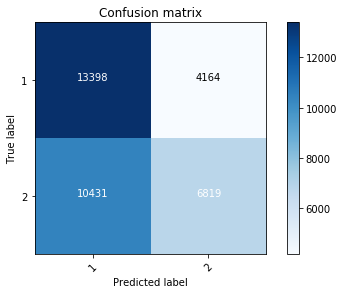

In [36]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_knn, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix')

## Logistic regression

In [37]:
lr = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
yhat_lr = lr.predict(x_test)
yhat_prob_lr = lr.predict_proba(x_test)
metrics.accuracy_score(y_test, yhat_lr)

0.6326266804550155

Confusion matrix, without normalization
[[10768  6794]
 [ 5995 11255]]


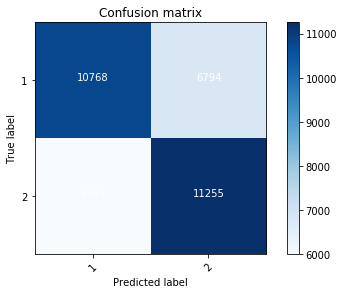

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_lr, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix')

## Support vector machine

In [39]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)

SVC()

In [40]:
yhat_svm = clf.predict(x_test)
metrics.accuracy_score(y_test, yhat_svm)

0.6290646903366656

Confusion matrix, without normalization
[[ 9017  8545]
 [ 4368 12882]]


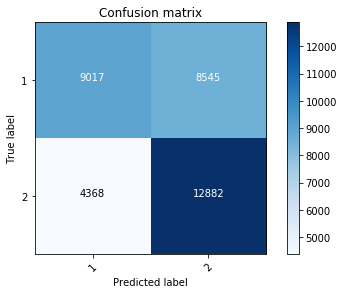

In [41]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix')

## Decision Tree Classifier

In [42]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
yhat_dtc = dtc.predict(x_test)
metrics.accuracy_score(y_test, yhat_dtc)

0.634781109962082

Confusion matrix, without normalization
[[ 9975  7587]
 [ 5127 12123]]


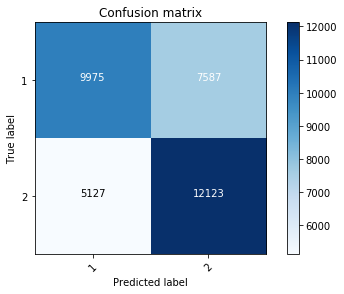

In [44]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_dtc, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix')

## XGBoost Classifier

In [45]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
yhat_xgb = xgb.predict(x_test)
metrics.accuracy_score(y_test, yhat_xgb)

0.6356428817649087

Confusion matrix, without normalization
[[ 9881  7681]
 [ 5003 12247]]


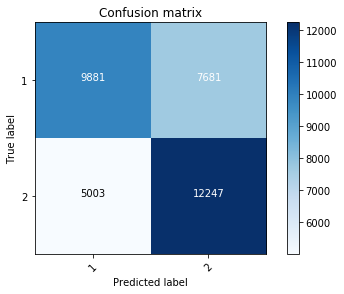

In [47]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_xgb, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix')

# Model evaluation

In [48]:
knn_score = metrics.accuracy_score(y_test, yhat_knn)
logreg_score = metrics.accuracy_score(y_test, yhat_lr)
svm_score = metrics.accuracy_score(y_test, yhat_svm)
dtc_score = metrics.accuracy_score(y_test, yhat_dtc)
xgb_score = metrics.accuracy_score(y_test, yhat_xgb)

In [49]:
knn_f1 = f1_score(y_test, yhat_knn, average='weighted')
logreg_f1 = f1_score(y_test, yhat_lr, average='weighted')
svm_f1 = f1_score(y_test, yhat_svm, average='weighted')
dtc_f1 = f1_score(y_test, yhat_dtc, average='weighted')
xgb_f1 = f1_score(y_test, yhat_xgb, average='weighted')

In [50]:
acc_df =pd.DataFrame(columns = ["Score","F1 Score"],index =["KNN","Logistic Regression","SVM", "Decision Tree", "XGBoost"])
acc_df.loc["KNN","Score"] =knn_score.round(3)
acc_df.loc["KNN","F1 Score"] =knn_f1.round(3)
acc_df.loc["Logistic Regression","Score"] =logreg_score.round(3)
acc_df.loc["Logistic Regression","F1 Score"] =logreg_f1.round(3)
acc_df.loc["SVM","Score"] = svm_score.round(3)
acc_df.loc["SVM","F1 Score"] = svm_f1.round(3)
acc_df.loc["Decision Tree","Score"] = svm_score.round(3)
acc_df.loc["Decision Tree","F1 Score"] = svm_f1.round(3)
acc_df.loc["XGBoost","Score"] = svm_score.round(3)
acc_df.loc["XGBoost","F1 Score"] = svm_f1.round(3)
acc_df

,Score,F1 Score
KNN,0.581,0.566
Logistic Regression,0.633,0.633
SVM,0.629,0.624
Decision Tree,0.629,0.624
XGBoost,0.629,0.624


# Discussion

After training five different models, the k-nearest neighbor had an accuracy of 0.581 and an F1 score of 0.566, the Logistic regression model had an accuracy of 0.633 and an F1 score of 0.633, the SVM had an accuracy of 0.629 and an F1 score of 0.624, the decision tree also had an accuracy of 0.629 and F1 score of 0.624 and XGBoost had an accuracy of 0.629 and F1 score of 0.624.

# Conclusion

The models trained on the collision dataset provide a prediction to judge whether the collision would occur or not. The model also predicts the severity of collision in case of a collision. This model would help in reducing the collision and its severity.